 历届世界杯数据分析

In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
import numpy as np
from wordcloud import WordCloud
import networkx as nx
%matplotlib inline

In [3]:
matches = pd.read_csv('WorldCupMatches.csv')
players = pd.read_csv('WorldCupPlayers.csv')
cups = pd.read_csv('WorldCups.csv')

In [4]:
matches.isnull().sum()
sns.set_style('darkgrid')

matches = matches.drop_duplicates(subset='MatchID', keep='first')

matches = matches[matches['Year'].notnull()]

matches["Home Team Name"] = matches["Home Team Name"].str.replace('rn">United Arab Emirates',"United Arab Emirates")
matches["Home Team Name"] = matches["Home Team Name"].str.replace("C�te d'Ivoire","Côte d’Ivoire")
matches["Home Team Name"] = matches["Home Team Name"].str.replace('rn">Republic of Ireland',"Republic of Ireland")
matches["Home Team Name"] = matches["Home Team Name"].str.replace('rn">Bosnia and Herzegovina',"Bosnia and Herzegovina")
matches["Home Team Name"] = matches["Home Team Name"].str.replace('rn">Serbia and Montenegro',"Serbia and Montenegro")
matches["Home Team Name"] = matches["Home Team Name"].str.replace('rn">Trinidad and Tobago',"Trinidad and Tobago")
matches["Home Team Name"] = matches["Home Team Name"].str.replace("Soviet Union","Russia")
matches["Home Team Name"] = matches["Home Team Name"].str.replace("Germany FR","Germany")

matches["Away Team Name"] = matches["Away Team Name"].str.replace('rn">United Arab Emirates',"United Arab Emirates")
matches["Away Team Name"] = matches["Away Team Name"].str.replace("C�te d'Ivoire","Côte d’Ivoire")
matches["Away Team Name"] = matches["Away Team Name"].str.replace('rn">Republic of Ireland',"Republic of Ireland")
matches["Away Team Name"] = matches["Away Team Name"].str.replace('rn">Bosnia and Herzegovina',"Bosnia and Herzegovina")
matches["Away Team Name"] = matches["Away Team Name"].str.replace('rn">Serbia and Montenegro',"Serbia and Montenegro")
matches["Away Team Name"] = matches["Away Team Name"].str.replace('rn">Trinidad and Tobago',"Trinidad and Tobago")
matches["Away Team Name"] = matches["Away Team Name"].str.replace("Germany FR","Germany")
matches["Away Team Name"] = matches["Away Team Name"].str.replace("Soviet Union","Russia")

cups['Winner'] = cups["Winner"].replace("Germany FR","Germany")
cups["Runners-Up"] = cups["Runners-Up"].replace("Germany FR","Germany")
cups['Year1'] = cups['Year'].astype(str)

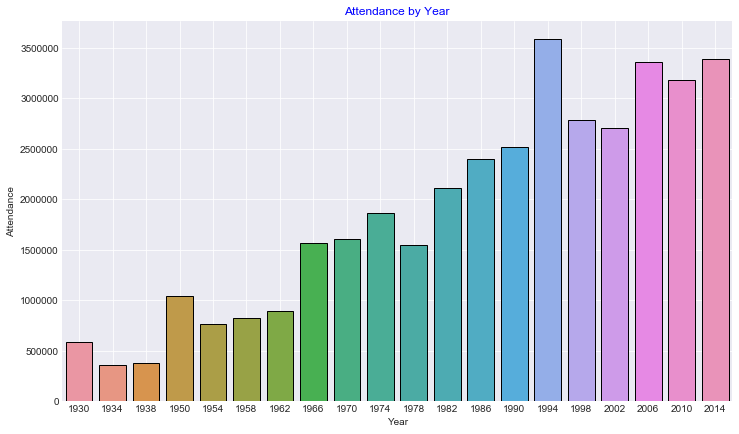

In [7]:
"""
# Total attendence of world cups by year
"""
# att = matchs.groupby('Year')['Attendance'].sum().reset_index()
att = matches[['Year', 'Attendance']].groupby("Year", as_index=False).sum()
# print(att.info())

att['Year'] = att['Year'].astype(int)
plt.figure(figsize=(12, 7))
sns.barplot(att['Year'], att['Attendance'], linewidth=1, edgecolor="k"*len(att))
plt.grid(True)
plt.title("Attendance by Year", color='b')
plt.show()


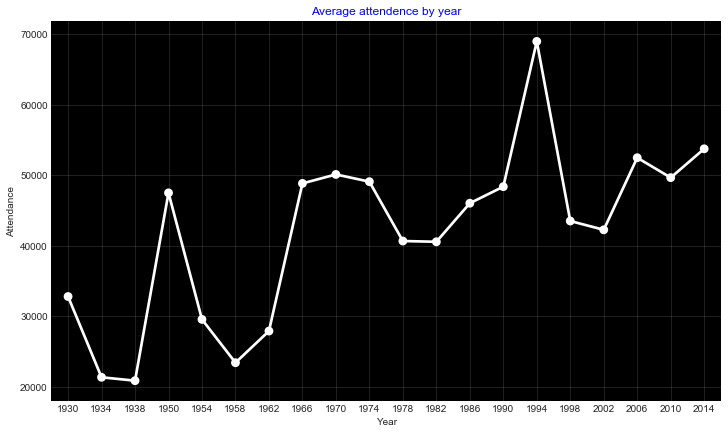

In [8]:
"""
Average attendence by year
"""
att = matches[['Year', 'Attendance']].groupby('Year', as_index=False).mean()
att['Year']  = att['Year'].astype(int)
plt.figure(figsize=(12, 7))     # inch
ax = sns.pointplot(att['Year'], att['Attendance'], color='w')  # color属性可以用来设置颜色
ax.set_facecolor("k")   # 背景颜色，k表示黑色
plt.grid(True, color='gray', alpha=.3)  # 是否展示表格线条，颜色和透明度
plt.title("Average attendence by year",color='b')
plt.show()

[1930 1934 1938 1942 1946 1950 1954 1958 1962 1966 1970 1974 1978 1982 1986
 1990 1994 1998 2002 2006 2010]


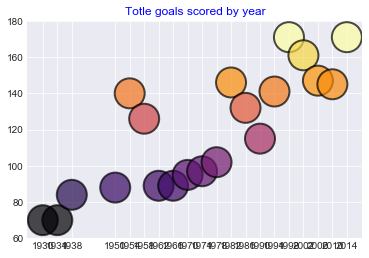

In [14]:
"""
Total goals scored by year
"""

plt.figure(figsize=(200, 100))
fig1, ax = plt.subplots()

ax.scatter('Year1', 'GoalsScored', data=cups,
                 c=cups['GoalsScored'], cmap='inferno',
                 s=900, alpha=.7,
                 linewidths=2, edgecolors='k')
yeartuple = cups['Year1'].unique()
print(np.arange(1930, 2014, 4))

xA_int = [1930, 1934, 1938, 1950, 1954, 1958, 1962, 1966, 1970, 1974, 1978, 1982, 1986, 1990, 1994, 1998, 2002, 2006, 2010, 2014]
xA = ["1930", "1934", "1938", "1950", "1954", "1958", "1962", "1966", "1970", "1974", "1978", "1982", "1986", "1990", "1994", "1998", "2002", "2006", "2010", "2014"]

ax.set_xticks(xA_int)
ax.set_xticklabels(xA)

ax.set_yticks(np.arange(60, 200, 20))
plt.title("Totle goals scored by year",  color='b')
plt.show()

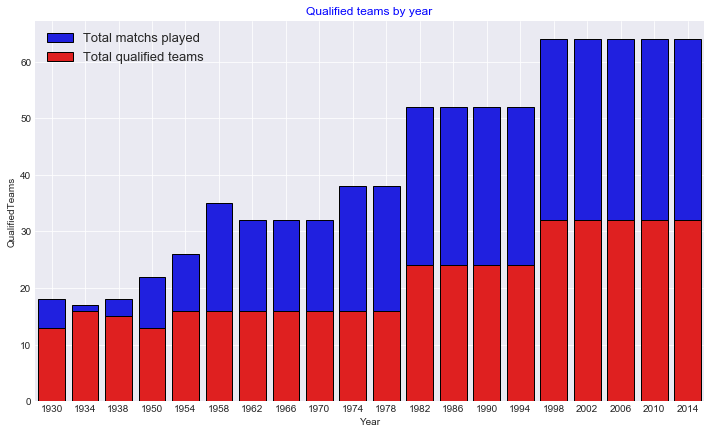

In [15]:
"""
Total matches played and qualified teams by year
"""

plt.figure(figsize=(12, 7))
sns.barplot(cups['Year'], cups['MatchesPlayed'], linewidth=1,
            edgecolor='k'*len(cups), color='b', label='Total matchs played')
sns.barplot(cups['Year'], cups['QualifiedTeams'], linewidth=1,
            edgecolor='k'*len(cups), color='r', label='Total qualified teams')
plt.legend(loc='best', prop={'size':13})
plt.title('Qualified teams by year', color='b')
plt.grid(True)
plt.show()


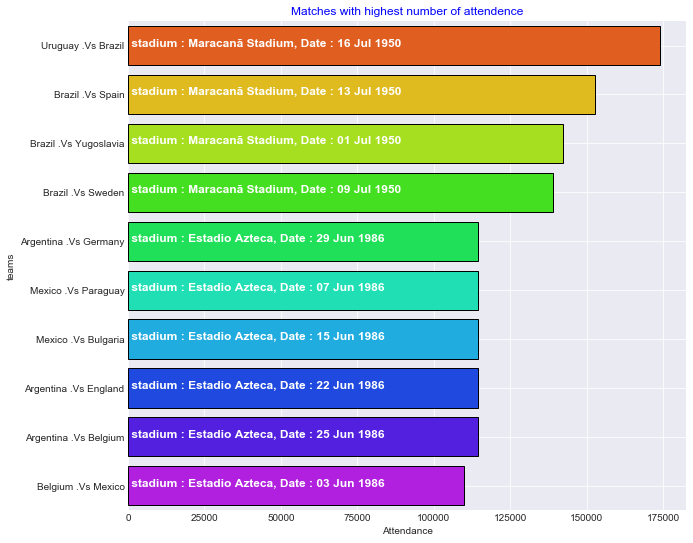

In [17]:
"""
Matches with highest number of attendance
"""
h_att = matches.sort_values(by='Attendance', ascending=False)[:10]
h_att = h_att[['Year', 'Datetime','Stadium', 'City', 'Home Team Name',
              'Home Team Goals', 'Away Team Goals', 'Away Team Name', 'Attendance', 'MatchID']]
h_att["Stadium"] = h_att["Stadium"].replace("Maracan� - Est�dio Jornalista M�rio Filho", "Maracanã Stadium")
h_att['Datetime'] = h_att["Datetime"].str.split('-').str[0]
h_att['mt'] = h_att['Home Team Name'] + " .Vs " + h_att['Away Team Name']

plt.figure(figsize=(10, 9))
ax = sns.barplot(y=h_att['mt'], x=h_att['Attendance'], palette='gist_rainbow',
                 linewidth=1, edgecolor="k"*len(h_att))
plt.ylabel('teams')
plt.xlabel('Attendance')
plt.title('Matches with highest number of attendence', color='b')
plt.grid(True)

for i, j in enumerate(' stadium : ' + h_att['Stadium'] + ", Date : "+ h_att['Datetime']) :
    ax.text(.7, i, j, fontsize=12, color='white', weight='bold')
plt.show()

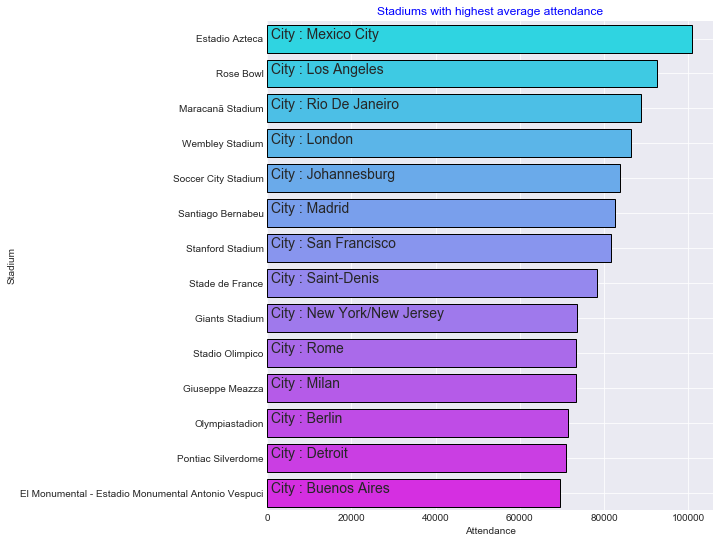

In [19]:
"""
Stadiums with highest average attendance
"""
matches['Stadium'] = matches['Stadium'].str.replace('Estadio do Maracana',"Maracanã Stadium")
matches['Stadium'] = matches['Stadium'].str.replace('Maracan� - Est�dio Jornalista M�rio Filho',
                                                  "Maracanã Stadium")
std = matches.groupby(['Stadium', 'City'])['Attendance'].mean().reset_index()\
    .sort_values(by='Attendance', ascending=False)

plt.figure(figsize=(8,9))
ax = sns.barplot(y=std['Stadium'][:14], x=std['Attendance'][:14], palette='cool',
                 linewidth=1, edgecolor='k'*14)
plt.grid(True)

for i,j in enumerate(' City : ' + std['City'][:14]):
    ax.text(.7, i, j, fontsize=14)

plt.title('Stadiums with highest average attendance', color='b')
plt.show()

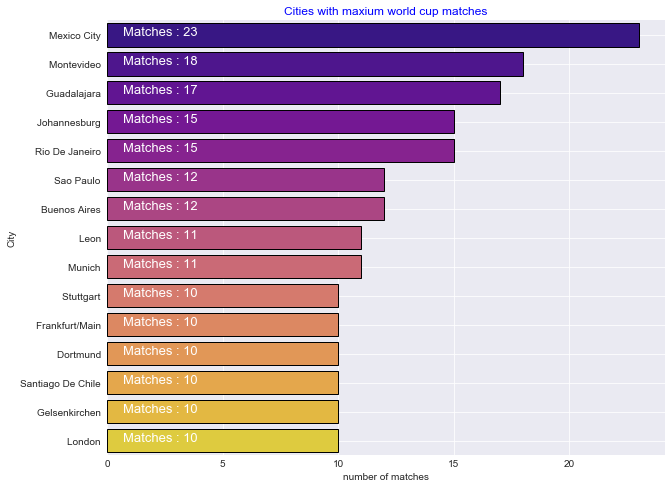

In [21]:
"""
Cities that hosted highest world cup matches
"""

mat_c = matches['City'].value_counts().reset_index()
# print(mat_c)
plt.figure(figsize=(10,8))
ax = sns.barplot(y=mat_c['index'][:15], x=mat_c['City'][:15],
                 palette='plasma', linewidth=1, edgecolor='k')
plt.xlabel('number of matches')
plt.ylabel('City')
plt.grid(True)
plt.title('Cities with maxium world cup matches', color='b')

for i, j in enumerate('Matches : ' + mat_c['City'][:15].astype(str)):
    ax.text(.7, i, j, fontsize=13, color='w')

plt.show()

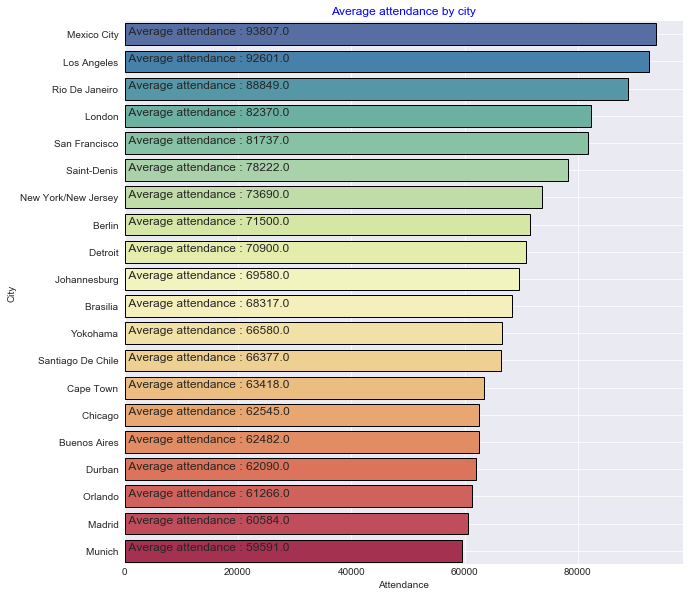

In [23]:
"""
Average attendance by city
"""
ct_at = matches.groupby('City')['Attendance'].mean().reset_index()
ct_at = ct_at.sort_values(by='Attendance', ascending=False)

plt.figure(figsize=(10, 10))
ax = sns.barplot('Attendance', "City", data=ct_at[:20],
                 linewidth=1, edgecolor= "k" * 20, palette='Spectral_r')

for i, j in enumerate(" Average attendance : " + np.around(ct_at['Attendance'][:20], 0).astype(str)):
    ax.text(.7, i, j, fontsize=12)
plt.grid(True)
plt.title('Average attendance by city', color='b')
plt.show()

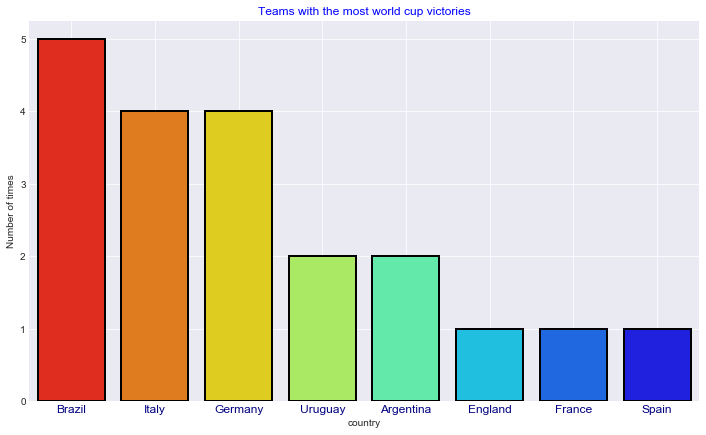

In [24]:
"""
Teams with the most world cup final victories
"""
cups['Winner'] = cups["Winner"].replace("Germany FR","Germany")
cups["Runners-Up"] = cups["Runners-Up"].replace("Germany FR","Germany")
cou = cups["Winner"].value_counts().reset_index()

plt.figure(figsize=(12, 7))
sns.barplot('index', 'Winner', data=cou, palette='jet_r',
            linewidth=2, edgecolor="k" * len(cou))
plt.grid(True)
plt.ylabel("Number of times")
plt.xlabel("country")
plt.title('Teams with the most world cup victories', color='b')
plt.xticks(color='navy', fontsize=12)
plt.show()


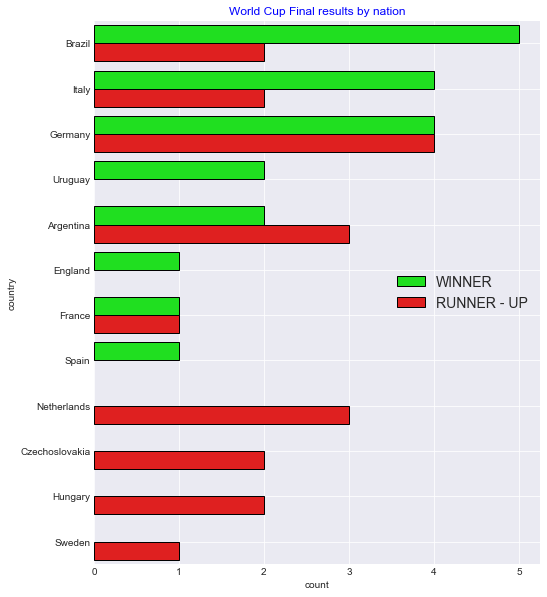

In [26]:
"""
World cup final results by nation
"""
cou = cups["Winner"].value_counts().reset_index()

cou_w = cou.copy()
cou_w.columns = ['country', 'count']
cou_w['type'] = "WINNER"

cou_r = cups['Runners-Up'].value_counts().reset_index()
cou_r.columns = ['country', 'count']
cou_r['type'] = 'RUNNER - UP'

cout_t = pd.concat([cou_w, cou_r], axis=0)
# print(cout_t)

plt.figure(figsize=(8, 10))
sns.barplot('count', 'country', data= cout_t, hue='type', palette=['lime', 'r'],
            linewidth=1, edgecolor='k')
plt.grid(True)
plt.legend(loc='center right', prop={'size':14})
plt.title('World Cup Final results by nation', color='b')
plt.show()


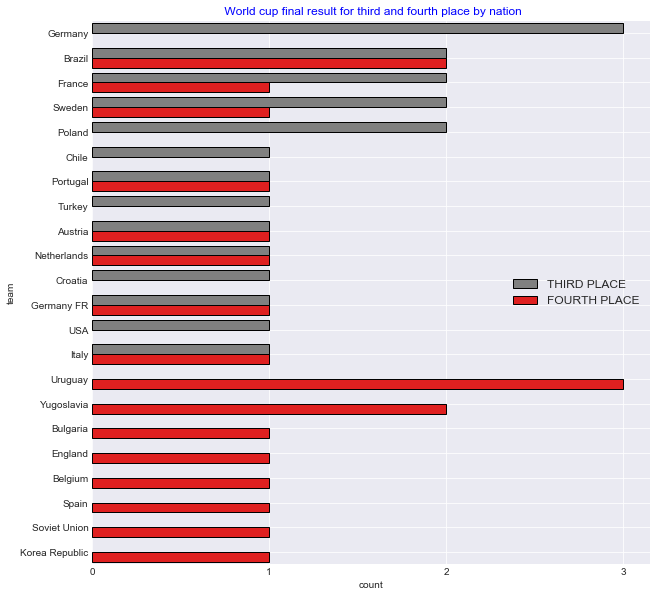

In [27]:
"""
World cup final result for third and fourth place by nation
"""
thrd = cups['Third'].value_counts().reset_index()
thrd.columns = ['team', 'count']
thrd['type'] = 'THIRD PLACE'

frth = cups['Fourth'].value_counts().reset_index()
frth.columns = ['team', 'count']
frth['type']  = 'FOURTH PLACE'

plcs = pd.concat([thrd, frth], axis=0)

plt.figure(figsize=(10, 10))
sns.barplot('count', 'team', data=plcs, hue='type', palette=['grey', 'r'],
            linewidth=1, edgecolor='k')
plt.grid(True)
plt.xticks(np.arange(0, 4, 1))
plt.title(" World cup final result for third and fourth place by nation", color='b')
plt.legend(loc='center right', prop={'size':12})
plt.show()

In [28]:
ht = matches['Home Team Name'].value_counts().reset_index()
ht.columns = ['team', 'matches']
at = matches['Away Team Name'].value_counts().reset_index()
at.columns = ['team', 'matches']
mt = pd.concat([ht, at], axis=0)
mt = mt.groupby('team')['matches'].sum().reset_index().sort_values(by='matches', ascending=False)

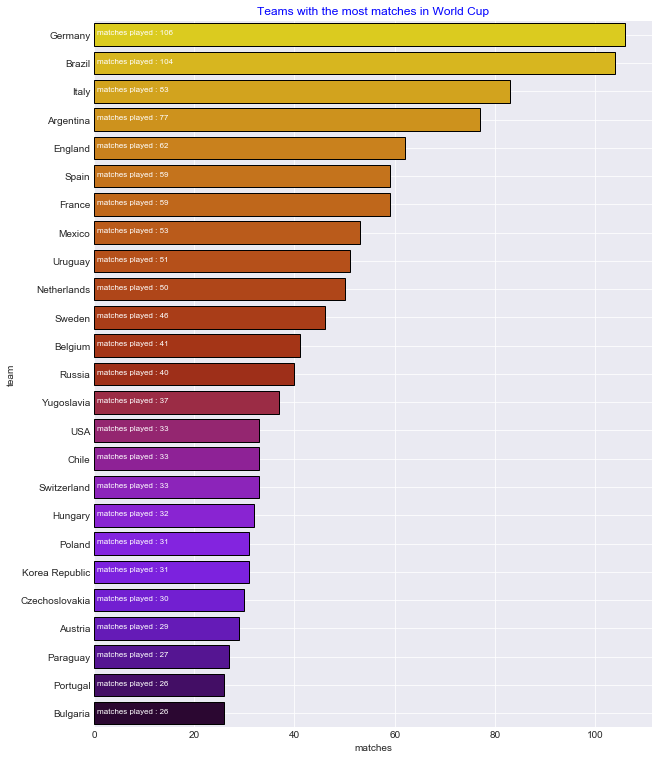

In [29]:
"""
Teams with the most world cup matches
"""
plt.figure(figsize=(10, 13))
ax = sns.barplot('matches', 'team', data=mt[:25], palette='gnuplot_r',
                 linewidth=1, edgecolor='k')
plt.grid(True)
plt.title('Teams with the most matches in World Cup', color='b')
for i, j in enumerate("matches played : " + mt['matches'][:25].astype(str)):
    ax.text(.7, i, j, fontsize=8, color='white')
plt.show()


/home/zhenmie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/zhenmie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


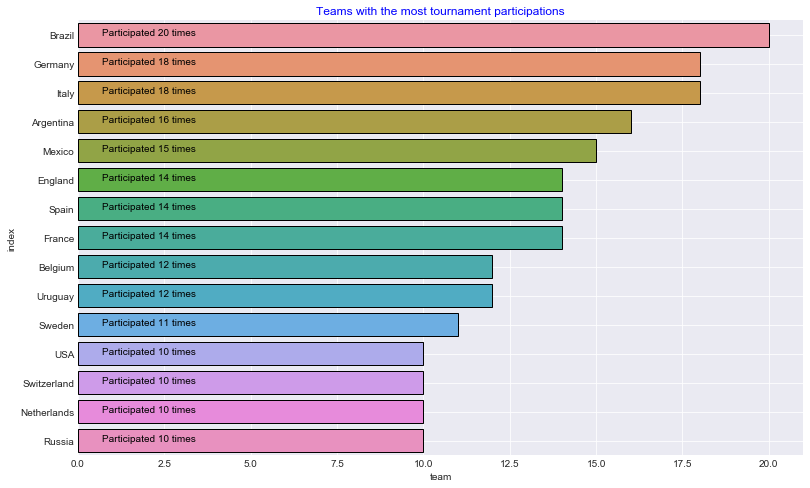

In [33]:
"""
Teams with the most tournament participations
"""
hy = matches[['Year', 'Home Team Name']]
hy.columns = ['year', 'team']
hy['type']  = 'HOME TEAM'
ay = matches[['Year', 'Away Team Name']]
ay.columns = ['year', 'team']
ay['type'] = 'AWAY TEAM'

home_away = pd.concat([hy, ay], axis=0)
yt = home_away.groupby(['year', 'team']).count().reset_index()
yt = yt['team'].value_counts().reset_index()
#print(yt)

plt.figure(figsize=(13, 8))
ax = sns.barplot('team', 'index', data=yt[:15], linewidth=1, edgecolor='k')

for i, j in enumerate('Participated ' + yt['team'][:15].astype(str) +  ' times'):
    ax.text(.7, i, j, fontsize=10, color='k')
plt.grid(True)

plt.title('Teams with the most tournament participations', color='b')
plt.show()


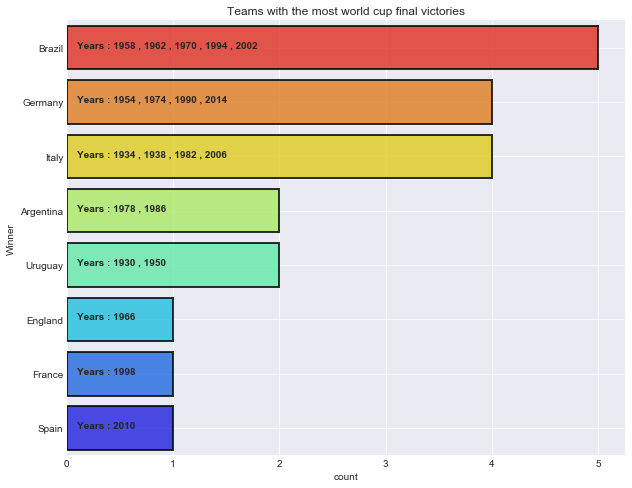

In [34]:
"""
Teams with the most world cup final victories
"""
c1 = cups.groupby("Winner")['Year1'].apply(' , '.join).reset_index()
c2 = cups.groupby('Winner')['Year'].count().reset_index()
c12 = c1.merge(c2, left_on="Winner", right_on='Winner', how='left')
c12 = c12.sort_values(by='Year', ascending=False)

plt.figure(figsize=(10, 8))
ax = sns.barplot("Year", "Winner", data=c12, palette='jet_r',
                 alpha=.8, linewidth=2, edgecolor='k')
for i, j in enumerate('Years : ' + c12['Year1']):
    ax.text(.1, i, j, weight = 'bold')

plt.title('Teams with the most world cup final victories')
plt.grid(True)
plt.xlabel('count')
plt.show()


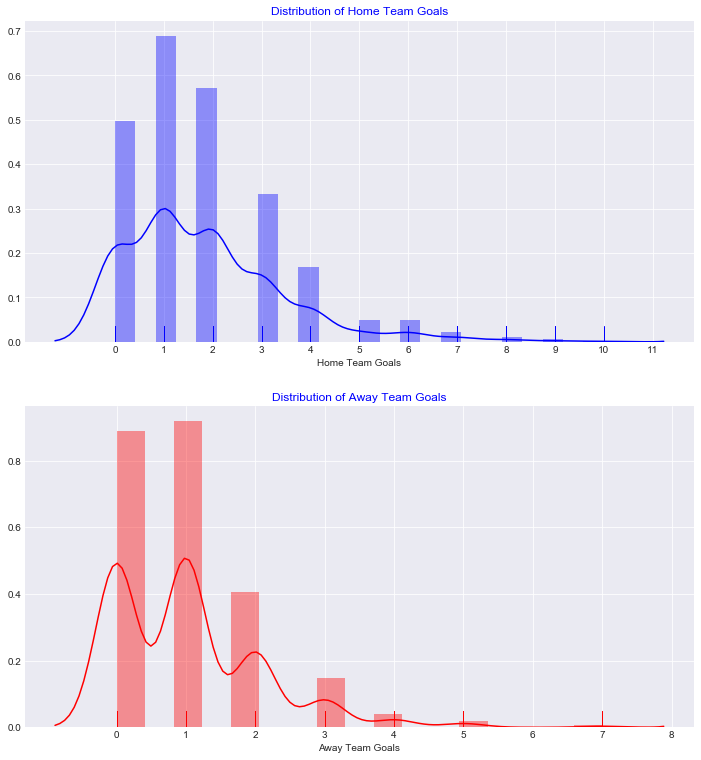

In [36]:
"""
Distribution of home and away goals
"""
plt.figure(figsize=(12, 13))
plt.subplot(211)
sns.distplot(matches['Home Team Goals'], color='b', rug=True)
plt.xticks(np.arange(0,12, 1))
plt.title('Distribution of Home Team Goals', color='b')

plt.subplot(212)
sns.distplot(matches['Away Team Goals'], color='r', rug=True)
plt.xticks(np.arange(0, 9, 1))
plt.title('Distribution of Away Team Goals', color='b')
plt.show()


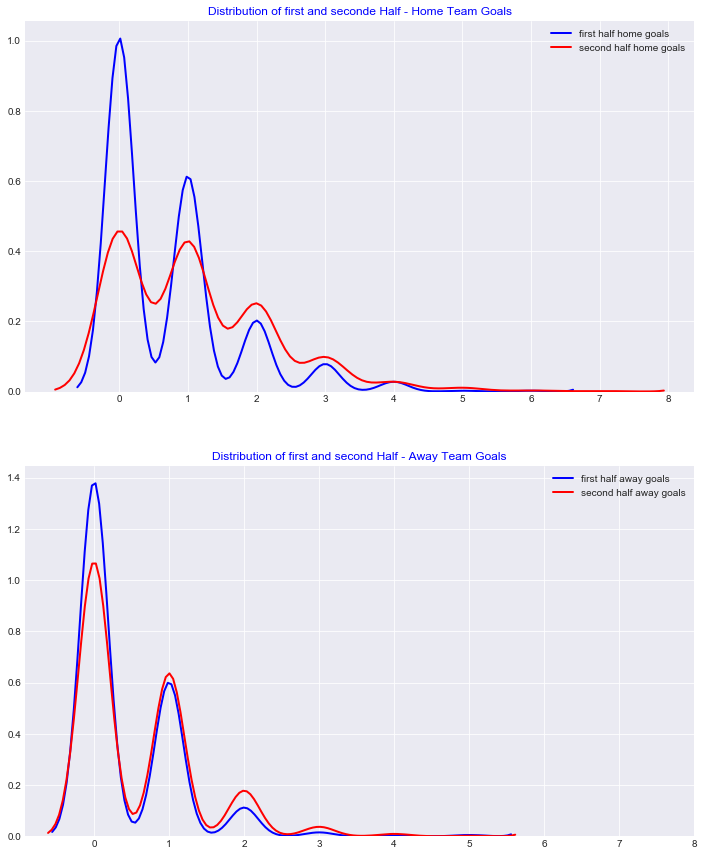

In [37]:
"""
Distribution of Half Time Home and Away Team Goals
"""
plt.figure(figsize=(12,15))
matches = matches.rename(columns={'Half-time Home Goals':"first half home goals",
                                  'Half-time Away Goals':"first half away goals"})
matches["second half home goals"] = matches["Home Team Goals"] - matches["first half home goals"]
matches["second half away goals"] = matches["Away Team Goals"] - matches["first half away goals"]

plt.subplot(211)
sns.kdeplot(matches['first half home goals'], color='b', linewidth=2)
sns.kdeplot(matches['second half home goals'], color='r', linewidth=2)
plt.xticks(np.arange(0, 9, 1))
plt.title('Distribution of first and seconde Half - Home Team Goals', color='b')

plt.subplot(212)
sns.kdeplot(matches['first half away goals'], color='b', linewidth=2)
sns.kdeplot(matches['second half away goals'], color='r', linewidth=2)
plt.xticks(np.arange(0, 9, 1))
plt.title('Distribution of first and second Half - Away Team Goals', color='b')
plt.show()


/home/zhenmie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/zhenmie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


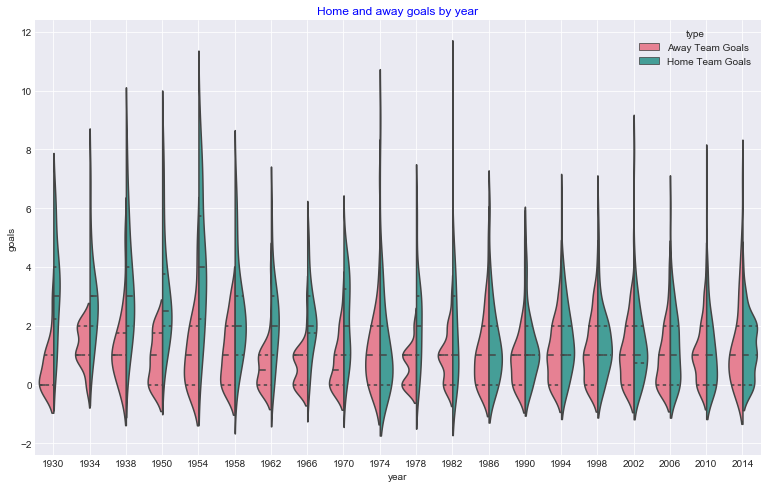

In [38]:
"""
Home and away goals by year
"""
gh = matches[['Year', 'Home Team Goals']]
gh.columns = ['year', 'goals']
gh['type']  = 'Home Team Goals'

ga = matches[['Year', "Away Team Goals"]]
ga.columns = ['year', 'goals']
ga['type'] = 'Away Team Goals'

gls = pd.concat([ga, gh], axis=0)
# print(gls)

plt.figure(figsize=(13, 8))
sns.violinplot(gls['year'], gls['goals'], hue=gls['type'], split=True,
               inner='quart', palette='husl')
plt.grid(True)
plt.title('Home and away goals by year', color='b')
plt.show()


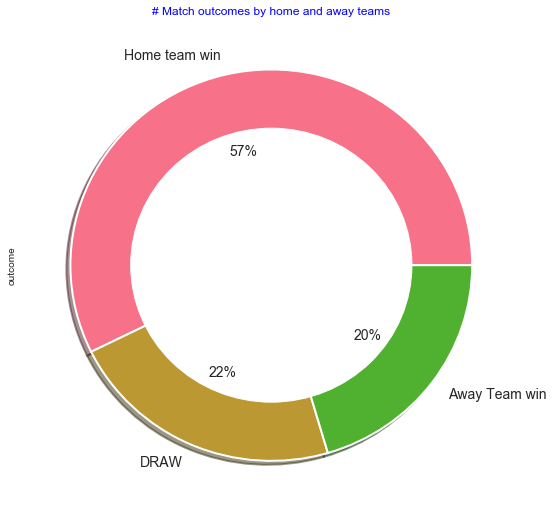

In [39]:
"""
Match outcomes by home and away teams
"""
def lable(matches):
    if matches['Home Team Goals'] > matches['Away Team Goals']:
        return 'Home team win'
    if matches['Away Team Goals'] > matches['Home Team Goals']:
        return 'Away Team win'
    if matches['Home Team Goals'] == matches['Away Team Goals']:
        return 'DRAW'

matches["outcome"] = matches.apply(lambda matches: lable(matches), axis=1)
plt.figure(figsize=(9, 9))
matches["outcome"].value_counts().plot.pie(autopct='%1.0f%%', fontsize=14,
                                           colors = sns.color_palette('husl'),
                                           wedgeprops={'linewidth':2, 'edgecolor':'white'},
                                           shadow=True)
circ = plt.Circle((0,0), .7, color='white')
plt.gca().add_artist(circ)
plt.title('# Match outcomes by home and away teams', color='b')
plt.show()


In [40]:
def win_label(matches):
    if matches['Home Team Goals'] > matches['Away Team Goals']:
        return matches['Home Team Name']
    if matches['Home Team Goals'] < matches['Away Team Goals']:
        return matches['Away Team Name']
    if matches['Home Team Goals'] == matches['Away Team Goals']:
        return 'DRAW'

def lost_label(matches):
    if matches['Home Team Goals'] < matches["Away Team Goals"]:
        return matches['Home Team Name']
    if matches['Home Team Goals'] < matches['Away Team Goals']:
        return matches['Away Team Name']
    if matches['Home Team Goals'] == matches['Away Team Goals']:
        return 'DRAW'

In [41]:
matches['win_team'] = matches.apply(lambda matches: win_label(matches), axis=1)
matches['lost_team'] = matches.apply(lambda matches: lost_label(matches), axis=1)
lst = matches['lost_team'].value_counts().reset_index()
win = matches['win_team'].value_counts().reset_index()

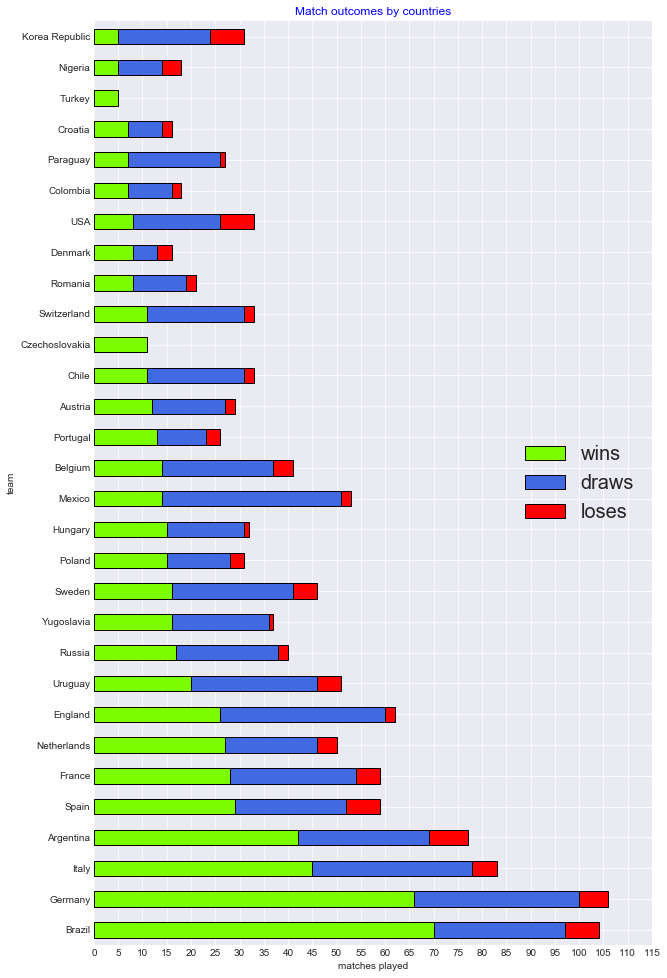

In [46]:
"""
Match outcomes by countries
"""
plt.figure(figsize=(15,10))
wl = win.merge(lst, left_on='index', right_on='index', how='left')
wl = wl[wl['index'] != 'DRAW']
wl.columns = ['team', 'wins', 'loses']

wl1 = wl.copy()
wl1 = wl1.merge(mt, left_on='team', right_on='team', how='left')
wl1['draws'] = wl1['matches'] - (wl1['wins'] + wl1['loses'])
wl1.index = wl1.team
wl1 = wl1.sort_values(by='wins', ascending=False)[:30]
# print(wl1)
wl1[['wins', 'draws', 'loses']].plot(kind='barh', stacked=True, figsize=(10, 17),
                                     color=['lawngreen', 'royalblue', 'red'],
                                     linewidth=1, edgecolor='k')
plt.legend(loc='center right', prop={'size':20})
plt.xticks(np.arange(0,120,5))
plt.title('Match outcomes by countries', color='b')
plt.xlabel('matches played')
plt.show()


In [47]:
tt_gl_h = matches.groupby('Home Team Name')['Home Team Goals'].sum().reset_index()
tt_gl_h.columns = ['team', 'goals']

tt_gl_a = matches.groupby('Away Team Name')['Away Team Goals'].sum().reset_index()
tt_gl_a.columns = ['team', 'goals']

total_goals = pd.concat([tt_gl_h,tt_gl_a],axis=0)
total_goals = total_goals.groupby("team")["goals"].sum().reset_index()
total_goals = total_goals.sort_values(by="goals",ascending =False)
total_goals["goals"] = total_goals["goals"].astype(int)

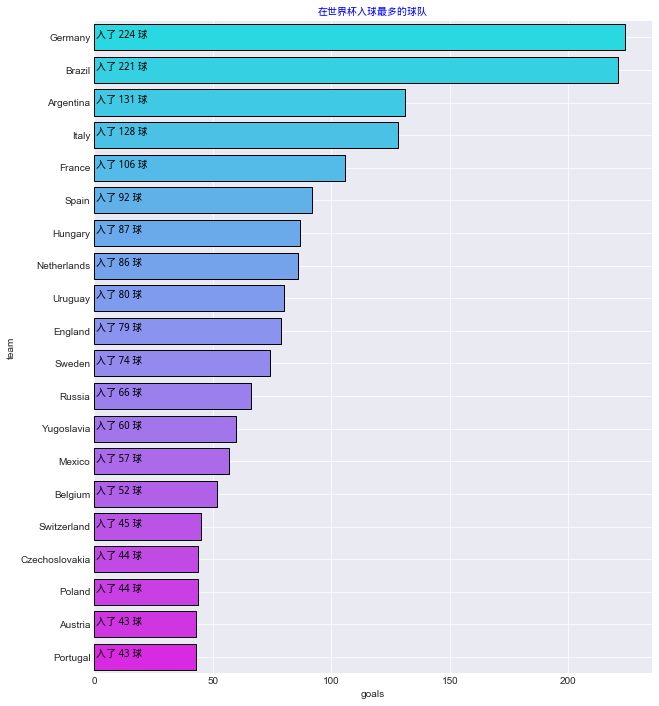

In [48]:
"""
Teams with highest fifa world cup goals
"""

myFont_url = "/home/zhenmie/Documents/ml/sunmnet/top250_args/wqy-microhei.ttc"
myFont = matplotlib.font_manager.FontProperties(fname=myFont_url)

plt.figure(figsize=(10, 12))
ax = sns.barplot('goals', 'team', data=total_goals[:20], palette='cool',
                 linewidth=1, edgecolor='k')
for i, j in enumerate("入了 " + total_goals['goals'][:20].astype(str) + ' 球'):
    ax.text(.7, i, j, fontsize=8, color='k', fontproperties=myFont)

#plt.title('Teams with highest fifa world cup goals', color='b')
plt.title('在世界杯入球最多的球队', color='b', fontproperties=myFont)
plt.grid(True)
plt.show()


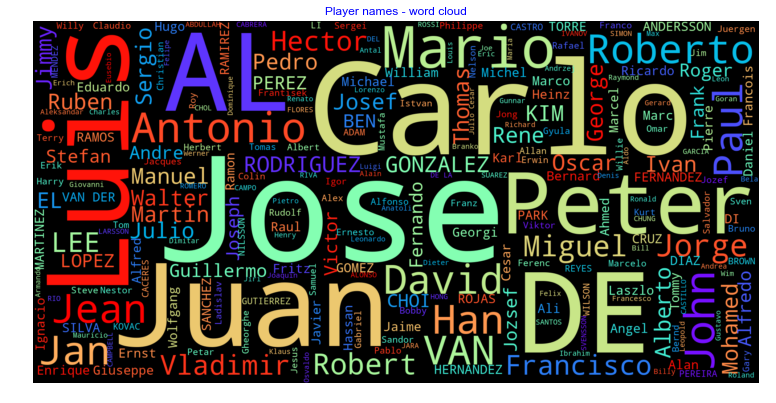

In [49]:
"""
Player names
"""
wrds = players["Player Name"].value_counts().keys()

wc = WordCloud(scale=5,max_words=1000,colormap="rainbow").generate(" ".join(wrds))
plt.figure(figsize=(13,14))
plt.imshow(wc,interpolation="bilinear")
plt.axis("off")
plt.title("Player names - word cloud",color='b')
plt.show()
